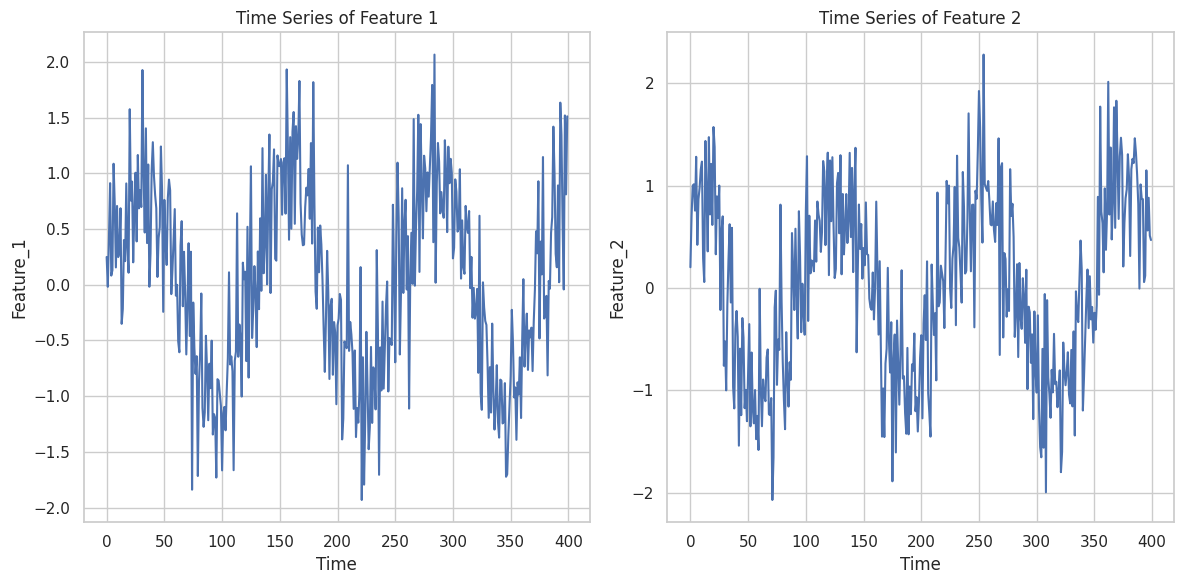

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set the style for visualizations
sns.set(style="whitegrid")

# Generating synthetic time series data
np.random.seed(42)
time = np.arange(0, 400)
feature_1 = np.sin(time * 0.05) + np.random.normal(scale=0.5, size=len(time))
feature_2 = np.cos(time * 0.05) + np.random.normal(scale=0.5, size=len(time))

# Creating a DataFrame
df_time_series = pd.DataFrame({'Time': time, 'Feature_1': feature_1, 'Feature_2': feature_2})

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(df_time_series[['Feature_1', 'Feature_2']])
df_normalized = pd.DataFrame(features_normalized, columns=['Feature_1', 'Feature_2'])

# Visualizing the synthetic time series data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Time', y='Feature_1', data=df_time_series)
plt.title('Time Series of Feature 1')

plt.subplot(1, 2, 2)
sns.lineplot(x='Time', y='Feature_2', data=df_time_series)
plt.title('Time Series of Feature 2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


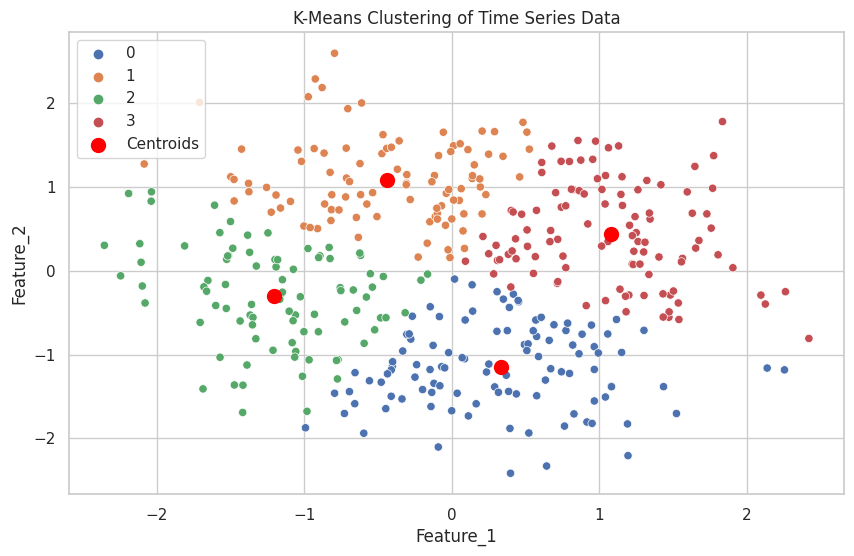

In [3]:
from sklearn.cluster import KMeans

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_normalized, palette="deep")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-Means Clustering of Time Series Data')
plt.legend()
plt.show()


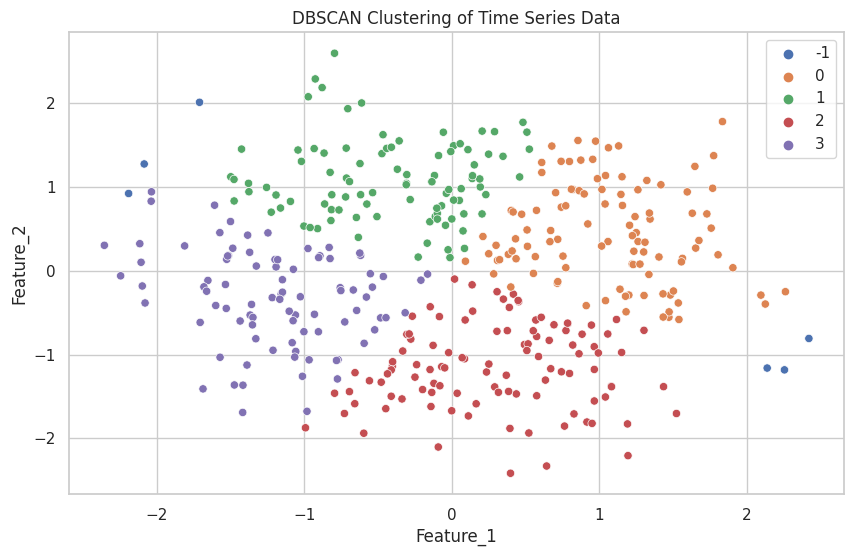

In [4]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_normalized['DBSCAN_Cluster'] = dbscan.fit_predict(df_normalized)

# Plotting the DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='DBSCAN_Cluster', data=df_normalized, palette="deep")
plt.title('DBSCAN Clustering of Time Series Data')
plt.legend()
plt.show()


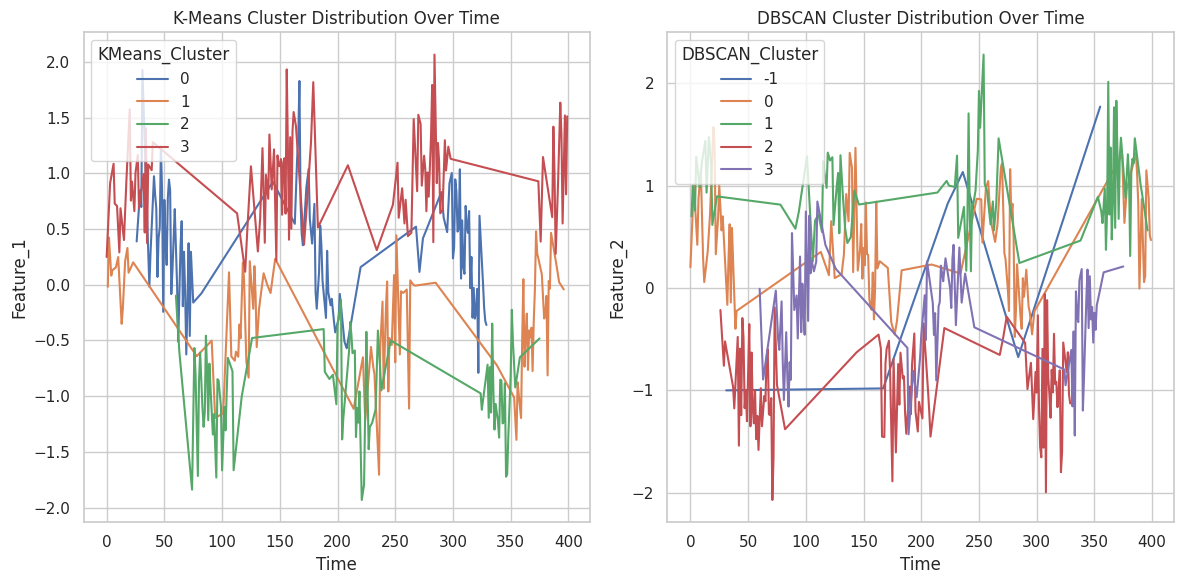

In [5]:
# Merging cluster labels with the original time series data
df_time_series['KMeans_Cluster'] = df_normalized['Cluster']
df_time_series['DBSCAN_Cluster'] = df_normalized['DBSCAN_Cluster']

# Visualizing Clusters Over Time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='Time', y='Feature_1', hue='KMeans_Cluster', data=df_time_series, palette="deep")
plt.title('K-Means Cluster Distribution Over Time')

plt.subplot(1, 2, 2)
sns.lineplot(x='Time', y='Feature_2', hue='DBSCAN_Cluster', data=df_time_series, palette="deep")
plt.title('DBSCAN Cluster Distribution Over Time')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

# Calculating the Silhouette Score for K-Means
silhouette_avg_kmeans = silhouette_score(df_normalized[['Feature_1', 'Feature_2']], df_normalized['Cluster'])
print("Silhouette Score for K-Means:", silhouette_avg_kmeans)


Silhouette Score for K-Means: 0.3631881971222455


In [7]:
# Handling the case where DBSCAN creates a single cluster or considers all points as noise
unique_clusters_dbscan = len(set(df_normalized['DBSCAN_Cluster']))

if unique_clusters_dbscan > 1 and -1 not in df_normalized['DBSCAN_Cluster']:
    silhouette_avg_dbscan = silhouette_score(df_normalized[['Feature_1', 'Feature_2']], df_normalized['DBSCAN_Cluster'])
else:
    silhouette_avg_dbscan = "Undefined (Single Cluster or Only Noise)"

print("Silhouette Score for DBSCAN:", silhouette_avg_dbscan)


Silhouette Score for DBSCAN: 0.3587716948219446


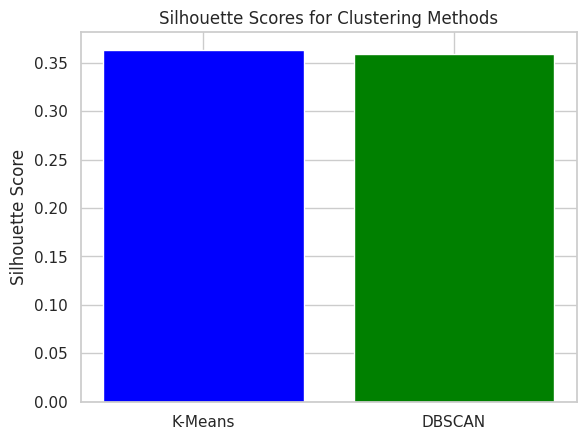

In [8]:
# Visualization of Silhouette Scores
scores = {'K-Means': silhouette_avg_kmeans, 'DBSCAN': silhouette_avg_dbscan if isinstance(silhouette_avg_dbscan, float) else None}
plt.bar(scores.keys(), scores.values(), color=['blue', 'green'])
plt.title('Silhouette Scores for Clustering Methods')
plt.ylabel('Silhouette Score')
plt.show()


In [9]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Score for K-Means
db_score_kmeans = davies_bouldin_score(df_normalized[['Feature_1', 'Feature_2']], df_normalized['Cluster'])
print("Davies-Bouldin Score for K-Means:", db_score_kmeans)

# Davies-Bouldin Score for DBSCAN
if unique_clusters_dbscan > 1 and -1 not in df_normalized['DBSCAN_Cluster']:
    db_score_dbscan = davies_bouldin_score(df_normalized[['Feature_1', 'Feature_2']], df_normalized['DBSCAN_Cluster'])
else:
    db_score_dbscan = "Undefined (Single Cluster or Only Noise)"
print("Davies-Bouldin Score for DBSCAN:", db_score_dbscan)


Davies-Bouldin Score for K-Means: 0.8302951915631493
Davies-Bouldin Score for DBSCAN: 2.8338350389196263


In [10]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz Index for K-Means
ch_score_kmeans = calinski_harabasz_score(df_normalized[['Feature_1', 'Feature_2']], df_normalized['Cluster'])
print("Calinski-Harabasz Index for K-Means:", ch_score_kmeans)

# Calinski-Harabasz Index for DBSCAN
if unique_clusters_dbscan > 1 and -1 not in df_normalized['DBSCAN_Cluster']:
    ch_score_dbscan = calinski_harabasz_score(df_normalized[['Feature_1', 'Feature_2']], df_normalized['DBSCAN_Cluster'])
else:
    ch_score_dbscan = "Undefined (Single Cluster or Only Noise)"
print("Calinski-Harabasz Index for DBSCAN:", ch_score_dbscan)


Calinski-Harabasz Index for K-Means: 323.4541517586575
Calinski-Harabasz Index for DBSCAN: 216.32182562120568


In [13]:
# Normalizing Davies-Bouldin and Calinski-Harabasz scores
db_max = max(metrics_df['Davies-Bouldin'])
db_min = min(metrics_df['Davies-Bouldin'])
ch_max = max(metrics_df['Calinski-Harabasz'])
ch_min = min(metrics_df['Calinski-Harabasz'])

metrics_df['Davies-Bouldin'] = (metrics_df['Davies-Bouldin'] - db_min) / (db_max - db_min)
metrics_df['Calinski-Harabasz'] = (metrics_df['Calinski-Harabasz'] - ch_min) / (ch_max - ch_min)

# Inverting Davies-Bouldin scores as lower is better
metrics_df['Davies-Bouldin'] = 1 - metrics_df['Davies-Bouldin']


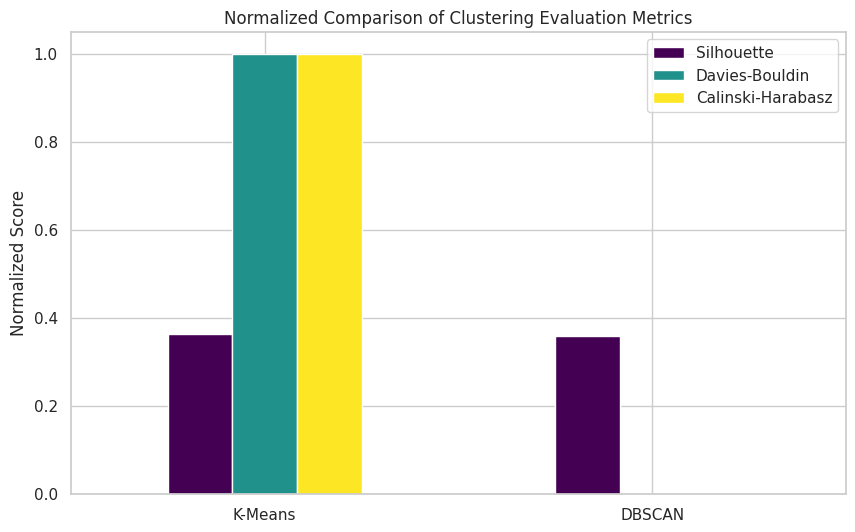

In [14]:
# Plotting the normalized metrics
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Normalized Comparison of Clustering Evaluation Metrics')
plt.ylabel('Normalized Score')
plt.xticks(rotation=0)
plt.show()
